## 实验：ROI 直方图

### 实验概要

OpenCV 同样提供了绘制直方图的函数，要进行绘图，同样需要 Matplotlib。该方法的核心优点是：它允许您在图像中查找选定感兴趣区域(ROI)的直方图。

通过使用适当的掩码，这个 ROI 被传达给命令。这个掩码是一个二值图像。通过白色像素表示 ROI 区域，而是用黑色像素表示其它非关注区域。

用于计算图像特定通道的直方图的命令如下：

```python
cv2.calcHist([images], [channels], mask, [histSize], [ranges])
```

带方括号的参数，必须始终以列表形式输入 —— 让我们看一下不同的参数：

- **`[image]`：** 这是包含您的输入图像的列表，它可以是 2D 或 3D。
- **`[channels]`：** 这是您要计算其直方图的图像平面的索引。
 - 对于灰度图像或二进制图像，只能为 `0`。它也以列表`[]`的形式输入。
 - 对于 `BGR` 图像，您可以提供单个通道的索引，如`[0]`，`[1]` 或 `[2]`。
 - 计算多个平面的直方图时，可以相应地提供值。例如 ——
   - 对于组合的 `B` 和 `G` 平面：`[0,1]`；
   - 对于所有三个组合的平面：`[0,1,2]`。
- **`mask`：** 这是一个二进制图像。它在相应的 ROI 区域内有一个白色区域，在其他地方有一个黑色区域。如果要查找完整图像的直方图（无掩码），则只需在其位置上写 `None`即可。
- **`[histSize]`：** 这是您要使用的分箱数量。
 - 如果您只有一个通道，则此列表只有一个号码（例如：`[10]`）；
 - 当计算两个通道的直方图时，此列表将具有两个数字（例如：`[10,10]`）；
 - 当一起计算三个通道的直方图时，此列表将具有三个数字（例如：`[10,10,10]`）。
- **`[ranges]`：** 这是每个维度中直方图分箱边界的范围。它也以列表 `[]` 的形式给出。
 - 对于单个通道，您可以提供单个值，例如：`[0,255]`；
 - 对于多个通道，您必须为每个通道提供完整的范围 ——
  - 两个通道：`[0,255, 0,255]`；
  - 三个通道：`[0,255, 0,255, 0,255]`。

### 实验目标

本实验中，我们将通过给定的掩码（蒙版），应用于 RGB 图像作为选定特定的区域（ROI）。

以此，查看图像的红色平面在 ROI 中的分布。

我们将采用下面这幅樱桃的图像。这种通过根据果实的颜色，识别对应色彩通道的直方图分布的技术，能有效的将计算机视觉应用到智能采摘等任务上。

<img src="./img/flowers.jpeg" width="50%">

### 1. 导入依赖库

In [1]:
import cv2                       # 导入OpenCV
import numpy as np               # 导入numPy              
import matplotlib.pyplot as plt  # 导入matplotlib

# 魔法指令，使图像直接在Notebook中显示
%matplotlib inline

### 2. 加载图像

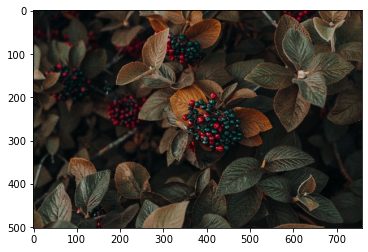

In [2]:
# 设置输入输出路径
import os
base_path = os.environ.get("BASE_PATH",'../data/')
data_path = os.path.join(base_path + "lab3/")
result_path = "result/"
os.makedirs(result_path, exist_ok=True)

# 读取图像文件
im = cv2.imread('./data/flowers.jpeg')          

# 将图像转换为RGB
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)) 
# 显示图像
plt.show()                                      

### 3. 制作蒙版图片

我们的目标是在图像上选定一块区域，并且绘制该区域（而不是整幅图像）的红色通道直方图，如下图蓝色框出的区域所示：

<img src="./img/5.jfif" width="50%">

首先，我们先手动指定需要采集 ROI 区域，这是通过一张掩码蒙版图片实现的：

<img src="./img/6.jfif" width="54%">

制作掩码蒙版图片实际上是一张全黑的图片，然后通过白色将 ROI 区域标识出来。因此，我们需要定义 ROI 区域的四个参数 ——

- 起点的（X,Y）轴坐标（x,y）
- 从起点开始，ROI 区域的宽（w）
- 从起点开始，ROI 区域的长（h）

**注意：OpenCV 的坐标轴原点是图像的左上角，你可以比对实验中输出图片上的坐标轴确认。**

通过这四个参数，我们便能确定黑色蒙版图像上的白色 ROI 区域范围，如下图所示：

<img src="./img/7.jfif">

因此，我们首先定义以上的四个参数：

In [3]:
x = 410 # 定义起点X坐标
y = 190 # 定义起点Y坐标
w = 15  # 定义从起点开始，ROI 区域的宽度
h = 15  # 定义从起点开始，ROI 区域的高度

使用 `np.zeros` 函数创建一张全黑（即全 `0` 填充）的与图像 `im` 同样尺寸的图片

In [4]:
# 创建一张全零填充，与图像im同样尺寸的图片
mymask = np.zeros(im.shape[:2], dtype = "uint8") 

在蒙版的 ROI 中，将所有像素设为白色（255）：

In [5]:
# 在蒙版的ROI中，将所有像素设为白色（255）
mymask[int(y):int(y+h), int(x):int(x+w)]= 255 

显示蒙版图片：

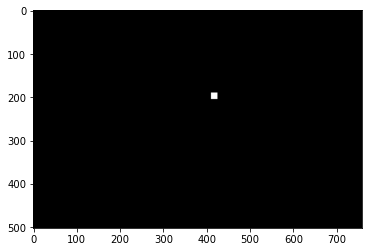

In [6]:
#cv2.imshow('Created mask', mymask)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# 显示图片
# 将图片转换为RGB
plt.imshow(cv2.cvtColor(mymask, cv2.COLOR_BGR2RGB)) 
# 显示图片
plt.show()                                          

### 4. 绘制 ROI 直方图

现在，我们已经有了原图像与蒙版图像，可以使用 `cv2.calcHist` 命令绘制红色通道的直方图。其中， `cv2.calcHist` 命令的几个参数输入为：
```python
cv2.calcHist([images], [channels], mask, [histSize], [ranges])
```
- `[images]`：为原图片 `[im]`；
- `[channels]`：我们要显示的 BGR 图片的 `红色` 通道，因此这里输入`[2]`
- `mask`：使用我们在上一步制作的蒙版文件 —— `mymask`
- `[histSize]`：分箱数量我们使用最大值 `256`
- `[ranges]`：我们只有单通道（红色），因此使用 `[0, 255]`

代码如下：

In [7]:
# 根据蒙版图像mymask定义的ROI区域，对im图像绘制红色通道的直方图
hist = cv2.calcHist([im],[2], mymask,[256], [0, 255]) 

显示 ROI 直方图，输出如下：

Text(0.5, 1.0, 'Red plane of ROI cherry')

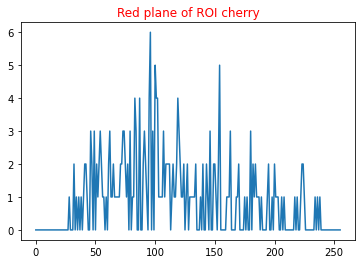

In [8]:
# 输出直方图
plt.plot(hist)                                    
# 定义直方图标题为“Red plane of ROI cherry”，字体为红色
plt.title('Red plane of ROI cherry', color='r')   

### 实验小结

在本实验中，您掌握了为图像创建自定义蒙版图像所必需的技能，学习了如何通过 `cv2.calcHist()` 命令，并结合蒙版图像，绘制图像特定 ROI 区域的直方图。